In [1]:
source(file.path(Sys.getenv("CODEBASE"),"DNAmeth500species/src/00.0_init.R"))

Warning message:
“no function found corresponding to methods exports from ‘XVector’ for: ‘concatenateObjects’”
Warning message:
“multiple methods tables found for ‘type’”


[1] "stats_annot.RData doesn't exist. Run script 01.2 to create. Only loading basic sample annotation."


ERROR: Error in is.data.frame(y): object 'stats_annot' not found


In [2]:
#functions
getStats=function(files){
  all_stats=data.table()
  for (file in files){
    stats=fread(file, fill = T)[,-58]
    if ("all_bases"%in%names(stats)){
    stats[,all_bases:=as.numeric(all_bases)/1000000,]
    setnames(stats,"all_bases","all_bases_Mio")}
    all_stats=rbindlist(list(all_stats,stats),use.names=TRUE,fill=TRUE)
  }
  return(all_stats)
}

In [3]:
stats_files=list.files(processed_dir,pattern="^summary.txt",recursive=TRUE,full.names=TRUE)

In [19]:
stats_files[[1]]

[1] "/scratch/lab_bock/shared/projects/compEpi/results_pipeline_rerun/AB/summary.txt"

In [56]:
failed_sp <- read.table("run_fail_processed_20210202.tsv", header = 1)$species

In [21]:
summary_sp <- sapply(stats_files, function(x) strsplit(x, "/")[[1]][8])

In [22]:
stats_files <- stats_files[!summary_sp %in% failed_sp]

In [23]:
stats_files <- stats_files[-345]

In [25]:
summary_sp[345]

/scratch/lab_bock/shared/projects/compEpi/results_pipeline_rerun/RUF/summary.txt 
                                                                           "RUF"

In [4]:
stats=getStats(stats_files)

In [5]:
head(stats)

sample,species,total_reads,mapped_reads,mapping_efficiency,informative_reads,CpG_meth,avg_meth,CpG_measurements,coveredCpGs,⋯,informative_reads_cphpg,CpG_meth_cphpg,avg_meth_cphpg,CpG_measurements_cphpg,coveredCpGs_cphpg,informative_reads_cphph,CpG_meth_cphph,avg_meth_cphph,CpG_measurements_cphph,coveredCpGs_cphph
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
AB_1_H,AB,17915886,14503179,80.95,14212635,70.10309,68.80228,39844139,3005867,⋯,8785282,1.4153425,1.279148,20443924,1856399,11119197,1.3300147,1.186452,59799241,5088253
AB_1_L,AB,25820984,18788076,72.76,18242848,70.13735,69.83810,60288099,2945274,⋯,15534318,1.6583739,1.350875,42525091,2333665,16933257,1.4696023,1.185794,110206190,6579650
AB_2_L,AB,25077071,15775689,62.91,15141710,71.93492,70.86057,47782490,3468644,⋯,12848990,1.5100792,1.363318,34439579,2728471,14122753,1.3368289,1.369762,91791481,7775515
AB_2_LU,AB,15347118,12960012,84.45,12752564,68.42933,69.02527,39173102,3013599,⋯,10788948,1.2387516,1.199700,28971829,2433490,11876493,1.0611154,1.045966,78646794,6739596
AB_2_L_uc,AB,17768895,11580889,65.18,11366867,95.05498,81.55941,39527823,2788706,⋯,11010796,98.5521020,93.594914,34138779,2895748,11446442,98.1863152,91.642113,91422326,8253533
ABB_1_H,ABB,15909049,12791093,80.40,12534298,63.44764,65.68175,36772462,3679371,⋯,11263569,0.9882298,1.219380,33308316,3659487,11753806,0.8858826,1.068926,83522643,8629816


In [7]:
length(unique(stats$species))

[1] 511

In [8]:
setnames(stats,"sample","Sample_Name")

In [9]:
#correct some sample names
stats[,Sample_Name:=sub("\\+","P",Sample_Name),]
stats[,Sample_Name:=sub("\\-","N",Sample_Name),]
stats[,Sample_Name:=sub("_macro","_Macro",Sample_Name),]

#add unified sample names (to also match the unconverted)
stats[,Sample_Name_unif:=gsub("_uc","",Sample_Name),]
#mark converted and unconverted samples
stats[,conversion_type:=ifelse(grepl("_uc",Sample_Name),"unconverted","converted"),]

In [10]:
#add some correlations (distance to diagonal)
stats[,res_mapRate_nonMotifReads:=(others+mapping_efficiency-100)/sqrt(2),]


In [11]:
write.table(stats, file.path(analysis_dir, "01_basicStats", "tempStats20210203.tsv"), sep = "\t", quote = F, row.names = F)

In [32]:
#stats_annot=merge(stats,sampleAnnot[,-c("Sample_Name"),],by="Sample_Name_unif")

Old stats:

In [12]:
 stats_old <- fread("/scratch/lab_bock/shared/projects/compEpi/results_analysis/01_basicStats/stats_annot.tsv")

In [13]:
head(stats_old)

Fortlaufende Nr,Patho-Nr,scientific_name,blast_species2,blast_species1,Sample_Name_unif,Sample_Name,species,total_reads,mapped_reads,⋯,conversionRate_qual_tier,k1_unmeth_qual_tier,k3_meth_qual_tier,others_qual_tier,fragments_uncovered_perc_qual_tier,cont_rat_qual_tier,max_lowest_common_qual_tier,max_qual_tier,mean_qual_tier,species_check
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
E24215,S22723,Lethenteron camtschaticum,Lampetra fluviatilis,Lethenteron camtschaticum,JL_1_GO,JL_1_GO,JL,30477314,28061151,⋯,2,2,3,2,1,3,2,3,2.000000,pass
E24215,S22723,Lethenteron camtschaticum,Petromyzon marinus,Lethenteron camtschaticum,JL_1_GO,JL_1_GO_uc,JL,12208850,10479075,⋯,2,2,1,2,3,2,1,3,1.888889,pass
E26428,S24205,Boltenia ovifera,Danio rerio,Ciona intestinalis,SSS_1_P,SSS_1_P,SSS,29588143,27093198,⋯,2,3,2,2,3,2,3,3,2.444444,pass
E26430,S24206,Boltenia ovifera,Pyura dura,Lottia gigantea,SSS_2_P,SSS_2_P,SSS,13693765,12410679,⋯,3,3,2,2,4,2,2,4,2.666667,pass
E26434,S24207,Boltenia ovifera,Angiostrongylus costaricensis,Ciona intestinalis,SSS_3_P,SSS_3_P,SSS,72257368,64441888,⋯,2,2,1,1,2,2,3,3,2.000000,pass
E26434,S24207,Boltenia ovifera,Herdmania momus,Ciona intestinalis,SSS_3_P,SSS_3_P_uc,SSS,28964679,25239013,⋯,3,2,1,1,2,3,2,3,2.111111,pass


In [14]:
head(stats)

Sample_Name,species,total_reads,mapped_reads,mapping_efficiency,informative_reads,CpG_meth,avg_meth,CpG_measurements,coveredCpGs,⋯,CpG_measurements_cphpg,coveredCpGs_cphpg,informative_reads_cphph,CpG_meth_cphph,avg_meth_cphph,CpG_measurements_cphph,coveredCpGs_cphph,Sample_Name_unif,conversion_type,res_mapRate_nonMotifReads
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>
AB_1_H,AB,17915886,14503179,80.95,14212635,70.10309,68.80228,39844139,3005867,⋯,20443924,1856399,11119197,1.3300147,1.186452,59799241,5088253,AB_1_H,converted,-4.20021428
AB_1_L,AB,25820984,18788076,72.76,18242848,70.13735,69.83810,60288099,2945274,⋯,42525091,2333665,16933257,1.4696023,1.185794,110206190,6579650,AB_1_L,converted,-0.59396970
AB_2_L,AB,25077071,15775689,62.91,15141710,71.93492,70.86057,47782490,3468644,⋯,34439579,2728471,14122753,1.3368289,1.369762,91791481,7775515,AB_2_L,converted,-0.62932504
AB_2_LU,AB,15347118,12960012,84.45,12752564,68.42933,69.02527,39173102,3013599,⋯,28971829,2433490,11876493,1.0611154,1.045966,78646794,6739596,AB_2_LU,converted,0.09192388
AB_2_L_uc,AB,17768895,11580889,65.18,11366867,95.05498,81.55941,39527823,2788706,⋯,34138779,2895748,11446442,98.1863152,91.642113,91422326,8253533,AB_2_L,unconverted,-5.15480843
ABB_1_H,ABB,15909049,12791093,80.40,12534298,63.44764,65.68175,36772462,3679371,⋯,33308316,3659487,11753806,0.8858826,1.068926,83522643,8629816,ABB_1_H,converted,-0.08485281


In [16]:
common_cols <- as.character(intersect(colnames(stats_old), colnames(stats)))

In [17]:
common_cols

[1] "blast_species2"            "blast_species1"           
 [3] "Sample_Name_unif"          "Sample_Name"              
 [5] "species"                   "total_reads"              
 [7] "mapped_reads"              "mapping_efficiency"       
 [9] "informative_reads"         "CpG_meth"                 
[11] "avg_meth"                  "CpG_measurements"         
[13] "coveredCpGs"               "conversionRate"           
[15] "k1_unmeth"                 "k3_meth"                  
[17] "totalMeasurements_k1"      "totalMeasurements_k3"     
[19] "total_reads_untrimmed"     "[CT]GG"                   
[21] "CGG"                       "TGG"                      
[23] "[CT]GA"                    "CGA"                      
[25] "TGA"                       "others"                   
[27] "all_bases_Mio"             "As"                       
[29] "Ts"                        "Cs"                       
[31] "Gs"                        "Ns"                       
[33] "perc_As"                   "perc_Ts"                  
[35] "perc_Cs"                   "perc_Gs"                  
[37] "perc_Ns"                   "fragments_ref"            
[39] "fragments_uncovered"       "fragments_uncovered_perc" 
[41] "max_cont_sp"               "max_cont"                 
[43] "cont"                      "cont_rat"                 
[45] "blast_count1"              "blast_count2"             
[47] "conversion_type"           "res_mapRate_nonMotifReads"

In [79]:
#stats_joined <- left_join(stats[, ..common_cols], stats_old[, ..common_cols], by = c("species", "Sample_Name", "Sample_Name_unif"))

##excluding from the comparison character-based columns

In [18]:
common_cols <- common_cols[c(-1,-2, -41)]

In [22]:
stats$perc_Cs <- as.numeric(stats$perc_Cs)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [27]:
compare_cols <- c("avg_meth", "mapped_reads", "coveredCpGs", "totalMeasurements_k1", "totalMeasurements_k3", "CpG_measurements", "species", "Sample_Name", "conversion_type")

In [28]:
colnames(stats)

[1] "Sample_Name"               "species"                  
 [3] "total_reads"               "mapped_reads"             
 [5] "mapping_efficiency"        "informative_reads"        
 [7] "CpG_meth"                  "avg_meth"                 
 [9] "CpG_measurements"          "coveredCpGs"              
[11] "conversionRate"            "k1_unmeth"                
[13] "k3_meth"                   "totalMeasurements_k1"     
[15] "totalMeasurements_k3"      "total_reads_untrimmed"    
[17] "[CT]GG"                    "CGG"                      
[19] "TGG"                       "[CT]GA"                   
[21] "CGA"                       "TGA"                      
[23] "others"                    "all_bases_Mio"            
[25] "As"                        "Ts"                       
[27] "Cs"                        "Gs"                       
[29] "Ns"                        "perc_As"                  
[31] "perc_Ts"                   "perc_Cs"                  
[33] "perc_Gs"                   "perc_Ns"                  
[35] "fragments_ref"             "fragments_uncovered"      
[37] "fragments_uncovered_perc"  "max_cont_sp"              
[39] "max_cont"                  "cont"                     
[41] "cont_rat"                  "blast_count1"             
[43] "blast_species1"            "blast_count2"             
[45] "blast_species2"            "PDR_summ"                 
[47] "N_sites"                   "informative_reads_cphpg"  
[49] "CpG_meth_cphpg"            "avg_meth_cphpg"           
[51] "CpG_measurements_cphpg"    "coveredCpGs_cphpg"        
[53] "informative_reads_cphph"   "CpG_meth_cphph"           
[55] "avg_meth_cphph"            "CpG_measurements_cphph"   
[57] "coveredCpGs_cphph"         "Sample_Name_unif"         
[59] "conversion_type"           "res_mapRate_nonMotifReads"

In [29]:
str(stats[, ..compare_cols])

Classes ‘data.table’ and 'data.frame':	2637 obs. of  9 variables:
 $ avg_meth            : num  68.8 69.8 70.9 69 81.6 ...
 $ mapped_reads        : int  14503179 18788076 15775689 12960012 11580889 12791093 15742708 5818906 4769269 6916385 ...
 $ coveredCpGs         : int  3005867 2945274 3468644 3013599 2788706 3679371 3408264 2508836 793934 2940441 ...
 $ totalMeasurements_k1: int  495 267 729 445 300 768 521 23 2264 173 ...
 $ totalMeasurements_k3: int  135887 9994 175579 176969 2349 348199 2298 14099 2618102 157411 ...
 $ CpG_measurements    : int  39844139 60288099 47782490 39173102 39527823 36772462 50580830 12915530 14057034 21706007 ...
 $ species             : chr  "AB" "AB" "AB" "AB" ...
 $ Sample_Name         : chr  "AB_1_H" "AB_1_L" "AB_2_L" "AB_2_LU" ...
 $ conversion_type     : chr  "converted" "converted" "converted" "converted" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [30]:
stats_melt <- melt(stats[, ..compare_cols], id.vars = c("species", "Sample_Name",  "conversion_type"))

Warning message in melt.data.table(stats[, ..compare_cols], id.vars = c("species", :
“'measure.vars' [avg_meth, mapped_reads, coveredCpGs, totalMeasurements_k1, ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion.”


In [31]:
stats_old_melt <- melt(stats_old[, ..compare_cols], id.vars = c("species", "Sample_Name", "conversion_type"))

Warning message in melt.data.table(stats_old[, ..compare_cols], id.vars = c("species", :
“'measure.vars' [avg_meth, mapped_reads, coveredCpGs, totalMeasurements_k1, ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion.”


In [33]:
stats_comp <- left_join(stats_melt, stats_old_melt, by = c("species", "Sample_Name",  "conversion_type", "variable"))

In [38]:
head(stats_comp)

species,Sample_Name,conversion_type,variable,new_value,old_value
<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>
AB,AB_1_H,converted,avg_meth,68.80228,68.80228
AB,AB_1_L,converted,avg_meth,69.83810,69.83810
AB,AB_2_L,converted,avg_meth,70.86057,70.86057
AB,AB_2_LU,converted,avg_meth,69.02527,69.02527
AB,AB_2_L_uc,unconverted,avg_meth,81.55941,81.55941
ABB,ABB_1_H,converted,avg_meth,65.68175,65.68175


In [36]:
colnames(stats_comp)[[5]] <- "new_value"
colnames(stats_comp)[[6]] <- "old_value"

In [37]:
setDT(stats_comp)

In [39]:
stats_comp[, delta_value:= abs(new_value-old_value)/old_value,]

In [41]:
pdf("compare_results_20210203.pdf", width = 12, height = 12)
ggplot(stats_comp, aes(x = new_value, y = old_value)) + geom_point() + geom_abline(slope = 1, linetype = "dashed") + 
    geom_text_repel(data = stats_comp[delta_value > 0.05,], aes(x = new_value, y = old_value, label = Sample_Name)) + facet_wrap(~variable, ncol = 3, scales = "free")
dev.off()

Warning message:
“Removed 19 rows containing missing values (geom_point).”


png 
  2

In [139]:
stats_comp_bugs <- stats_comp %>% filter(delta_value > 0.01) %>% 
        filter(!variable %in% c("k1_unmeth", "k3_meth", "blast_count1", "blast_count2", "res_mapRate_nonMotifReads", "conversionRate")) %>%
        group_by(species, Sample_Name) %>% summarize(n = n(), variables = paste0(variable))

`summarise()` has grouped output by 'species', 'Sample_Name'. You can override using the `.groups` argument.



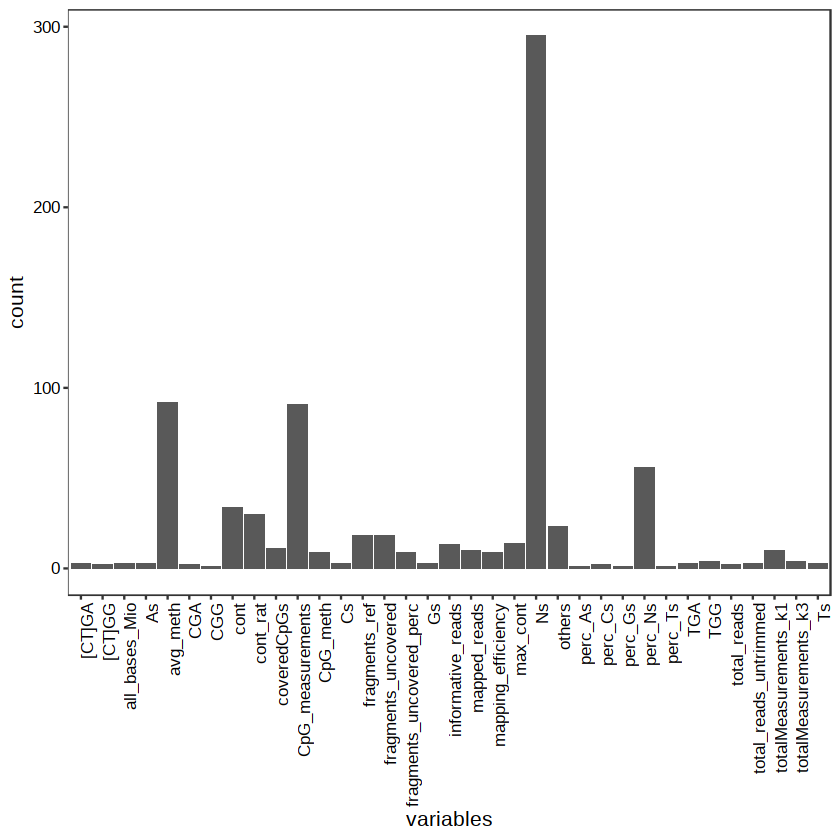

In [146]:
ggplot(stats_comp_bugs, aes(x = variables)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggsave("inconcistent_samples.pdf", width = 6, height = 4)

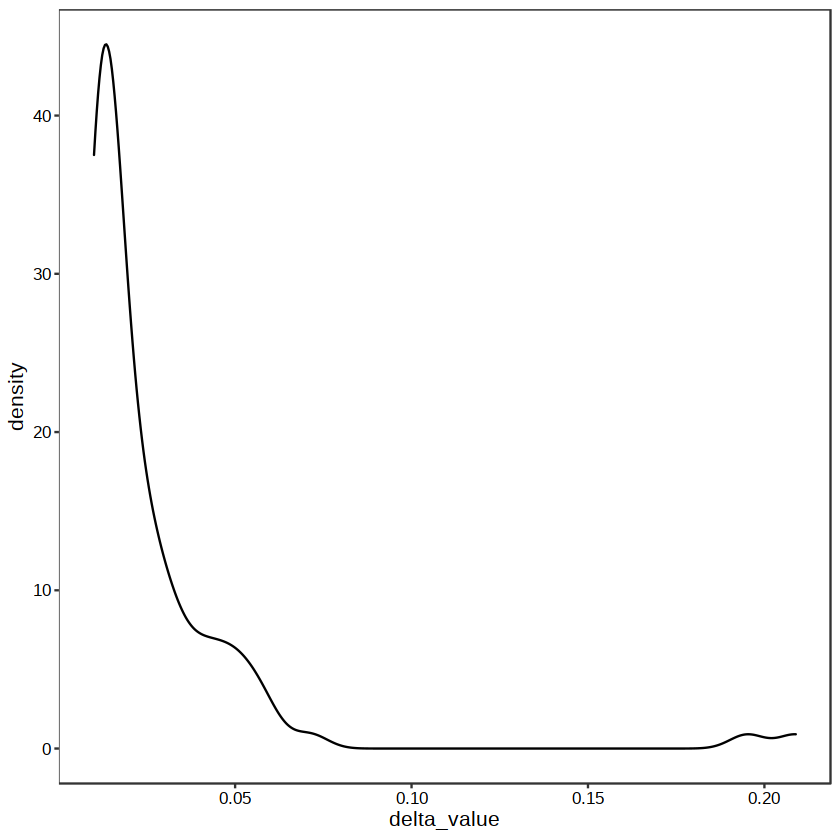

In [150]:
ggplot(stats_comp %>% filter(variable == "avg_meth") %>% filter(delta_value > 0.01), aes(x = delta_value)) + geom_density()

In [154]:
stats_comp %>% filter(variable == "avg_meth") %>% filter(delta_value > 0.05)

species,Sample_Name,Sample_Name_unif,conversion_type,variable,new_value,old_value,delta_value
FED,FED_1_L,FED_1_L,converted,avg_meth,63.60412,59.97628,0.06048792
FED,FED_2_H,FED_2_H,converted,avg_meth,58.75425,55.86591,0.05170116
FED,FED_2_L,FED_2_L,converted,avg_meth,62.77654,59.44308,0.05607813
LLA,LLA_1_Lymph,LLA_1_Lymph,converted,avg_meth,52.15483,49.32855,0.05729507
LLA,LLA_2_Lymph,LLA_2_Lymph,converted,avg_meth,50.24106,47.69334,0.05341865
OSO,OSO_1_H,OSO_1_H,converted,avg_meth,84.09203,69.56128,0.20889133
OSO,OSO_1_H_uc,OSO_1_H,unconverted,avg_meth,98.82594,92.24335,0.07136122
OSO,OSO_1_L,OSO_1_L,converted,avg_meth,83.77151,70.09550,0.19510539


In [151]:
stats_comp_bugs_5 <- stats_comp %>% filter(delta_value > 0.05) %>% 
        filter(!variable %in% c("k1_unmeth", "k3_meth", "blast_count1", "blast_count2", "res_mapRate_nonMotifReads", "conversionRate")) %>%
        group_by(species, Sample_Name) %>% summarize(n = n(), variables = paste0(variable))

`summarise()` has grouped output by 'species', 'Sample_Name'. You can override using the `.groups` argument.



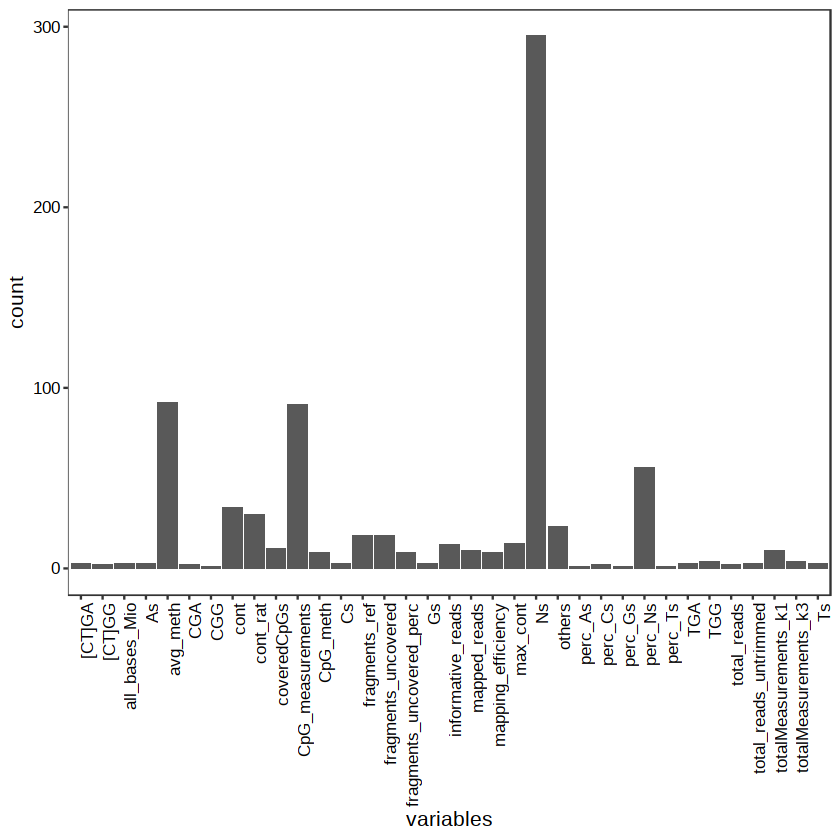

In [163]:
ggplot(stats_comp_bugs, aes(x = variables)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggsave("inconcistent_samples.pdf", width = 6, height = 4)

In [165]:
stats_comp_bugs %>% group_by(variables) %>% summarise(n = n()) %>% filter(n>50)

variables,n
avg_meth,92
CpG_measurements,91
Ns,295
perc_Ns,56


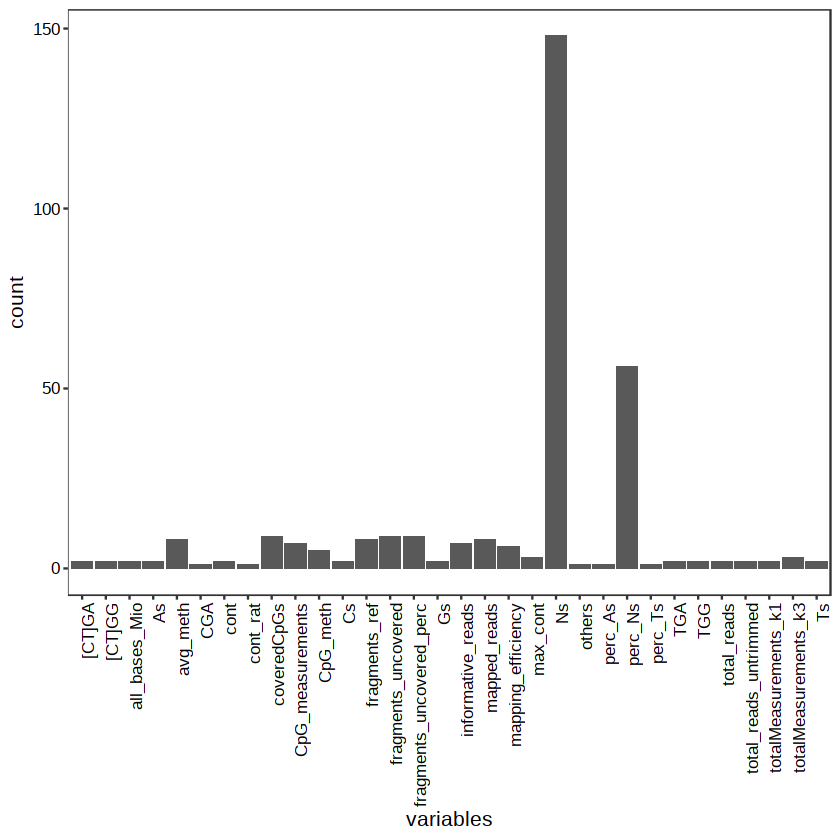

In [153]:
ggplot(stats_comp_bugs_5, aes(x = variables)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggsave("inconcistent_samples_morethan5.pdf", width = 6, height = 4)

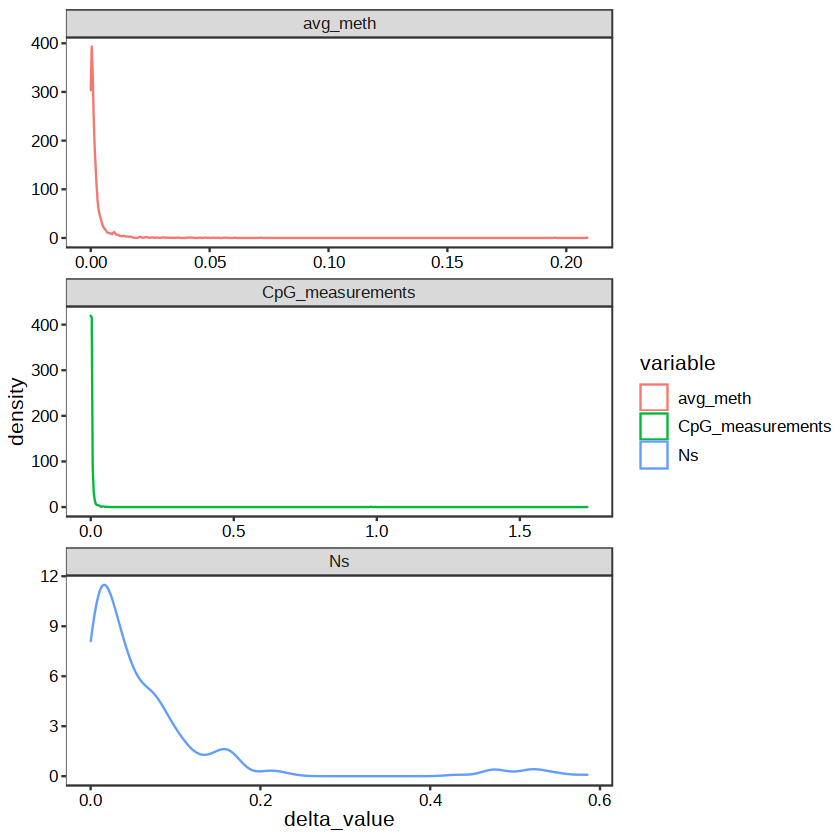

In [169]:
ggplot(stats_comp %>% filter(delta_value > 0) %>% 
        filter(variable %in% c("avg_meth", "CpG_measurements", "Ns")), aes(x = delta_value, color = variable)) + geom_density() + facet_wrap(~variable, scales = "free", ncol = 1)

In [177]:
stats_comp %>% filter(delta_value > 0.05) %>% 
        filter(!variable %in% c("k1_unmeth", "k3_meth", "blast_count1", "blast_count2", "res_mapRate_nonMotifReads", "conversionRate")) %>% 
        group_by(species) %>% summarize(n = n()) %>% filter(n > 5)

species,n
FED,34
OSO,30
RC,27
WA,21


In [182]:
stats_comp %>% filter(delta_value > 0.05) %>% 
        filter(variable %in% c("avg_meth", "CpG_measurements"))

species,Sample_Name,Sample_Name_unif,conversion_type,variable,new_value,old_value,delta_value
FED,FED_1_L,FED_1_L,converted,avg_meth,6.360412e+01,5.997628e+01,0.06048792
FED,FED_2_H,FED_2_H,converted,avg_meth,5.875425e+01,5.586591e+01,0.05170116
FED,FED_2_L,FED_2_L,converted,avg_meth,6.277654e+01,5.944308e+01,0.05607813
LLA,LLA_1_Lymph,LLA_1_Lymph,converted,avg_meth,5.215483e+01,4.932855e+01,0.05729507
LLA,LLA_2_Lymph,LLA_2_Lymph,converted,avg_meth,5.024106e+01,4.769334e+01,0.05341865
OSO,OSO_1_H,OSO_1_H,converted,avg_meth,8.409203e+01,6.956128e+01,0.20889133
OSO,OSO_1_H_uc,OSO_1_H,unconverted,avg_meth,9.882594e+01,9.224335e+01,0.07136122
OSO,OSO_1_L,OSO_1_L,converted,avg_meth,8.377151e+01,7.009550e+01,0.19510539
LLA,LLA_1_Lymph,LLA_1_Lymph,converted,CpG_measurements,3.347280e+07,3.547199e+07,0.05635981
LLA,LLA_2_Lymph,LLA_2_Lymph,converted,CpG_measurements,4.593822e+07,4.848416e+07,0.05251074


In [184]:
unique(stats_comp$variable)

[1] total_reads               mapped_reads             
 [3] mapping_efficiency        informative_reads        
 [5] CpG_meth                  avg_meth                 
 [7] CpG_measurements          coveredCpGs              
 [9] conversionRate            k1_unmeth                
[11] k3_meth                   totalMeasurements_k1     
[13] totalMeasurements_k3      total_reads_untrimmed    
[15] [CT]GG                    CGG                      
[17] TGG                       [CT]GA                   
[19] CGA                       TGA                      
[21] others                    all_bases_Mio            
[23] As                        Ts                       
[25] Cs                        Gs                       
[27] Ns                        perc_As                  
[29] perc_Ts                   perc_Cs                  
[31] perc_Gs                   perc_Ns                  
[33] fragments_ref             fragments_uncovered      
[35] fragments_uncovered_perc  max_cont                 
[37] cont                      cont_rat                 
[39] blast_count1              blast_count2             
[41] res_mapRate_nonMotifReads
41 Levels: total_reads mapped_reads mapping_efficiency ... res_mapRate_nonMotifReads

In [42]:
marked_fail <- stats_comp %>% filter(delta_value > 0.01) %>% 
        filter(variable %in% c("avg_meth", "mapped_reads", "coveredCpGs", "totalMeasurements_k1", "totalMeasurements_k3", "CpG_measurements"))

In [44]:
NROW(marked_fail)

[1] 243

In [46]:
blacklist_species <- unique(marked_fail$species)

In [47]:
stats <- stats[!species %in% blacklist_species,]

In [50]:
write.table(stats, file.path(analysis_dir, "01_basicStats", "tempStats20210203_upd.tsv"), sep = "\t", quote = F, row.names = F)

In [48]:
NROW(stats)

[1] 2342

In [49]:
length(unique(stats$species))

[1] 455

In [198]:
species_for_cleanup <- setdiff(setdiff(summary_sp, failed_sp), unique(marked_fail$species))

In [200]:
for (sp in species_for_cleanup){
    cat(paste0("/home/lv71484/droman/reffreedma/RefFreeDMA/scripts/cleanup.sh /global/lv71484/droman/DNAmeth500species//results_pipeline/", sp,
               "/meta/",sp,"_RefFreeDMA.cfg"),file = "cleanup_script_20210201.sh", append = T, sep = "\n")
}

failed in the run species, should be copied as they are:

In [5]:
for (sp in failed_sp){
    rsync_str  = paste0('rsync -a /global/lv71484/droman/DNAmeth500species/results_pipeline/', sp, '/ /binfl/lv71484/droman/DNAmeth500species/results_pipeline/', sp, '/')
    cat(paste0('sbatch --export=NONE  --get-user-env --job-name="rsync_', sp, '"',  '--ntasks-per-node=1 -N 1 --qos=normal_0064 --partition=mem_0064 --time=12:00:00 -o //global/lv71484/droman/DNAmeth500species/results_pipeline/00_RefFreeDMA_log/rsync_',
               sp, '.log --wrap="',rsync_str, '"'),
        file = "rsync_sbatch_20210201.sh", append = T, sep = "\n")
}

Status update:

In [250]:
full_status = data.frame(species = union(summary_sp, failed_sp), status = rep("CLEANUP", length(union(summary_sp, failed_sp))))

In [13]:
head(full_status)

species,status
<fct>,<fct>
AB,CLEANUP
ABB,NOT COMPLETE
ABU,NOT COMPLETE
AC,CLEANUP
ACO,CLEANUP
ACT,MISMATCH


In [253]:
setDT(full_status)

In [254]:
full_status[species %in% failed_sp, status:="NOT COMPLETE", ]

In [255]:
full_status[species %in% marked_fail$species, status:="MISMATCH", ]

In [11]:
tail(full_status)

,species,status
,<fct>,<fct>
474,RCB,NOT COMPLETE
475,PHL,NOT COMPLETE
476,BWP,NOT COMPLETE
477,ET,NOT COMPLETE
478,GCF,NOT COMPLETE
479,SEA,NOT COMPLETE


In [257]:
write.csv(full_status, "status_update_20210202.txt", sep = "\t", quote = F)

Warning message in write.csv(full_status, "status_update_20210202.txt", sep = "\t", :
“attempt to set 'sep' ignored”


In [52]:
full_status <- read.csv("status_update_20210202.txt", sep = ",", row.names = 1)

In [14]:
full_status[status=="CLEANUP", species]

[1] AB  AC  ACO AFB AGH AGS AI  AL  AN  ANG ANT ANW AR  ARC AS  ASH ASL ASQ
 [19] AST ATE ATH ATS AW  AX  BA  BAB BAS BBM BBR BC  BCC BCF BCR BD  BEA BEG
 [37] BF  BFD BGR BHP BI  BL  BLB BLC BLF BM  BMO BNS BOA BRL BRS BSB BSC BSG
 [55] BSH BSN BSP BST BTF BTR BTS BU  BUD BW  BWL BYM BYR CA  CAC CAM CAT CBU
 [73] CCL CCS CD  CDH CFL CH  CHA CHC CHD CHI CHM CHS CHU CK  CM  CNR CO  COB
 [91] COE COK COL COT COY CP  CRF CRH CRS CS  CSH CST CT  CTH CTT CW  DAS DE 
[109] DEH DG  DHU DO  DOG DP  DR  DS  DSH EB  EEO EGF EGW EH  EHA ELB EM  EO 
[127] EPC EPO EPT ES  ESH ESQ EUR EUS EV  EYV FBI FDO FF  FG  FL  FLA FLF FOX
[145] FPF FRG FS  GA  GAC GB  GCO GD  GE  GF  GHL GI  GJ  GP  GSQ GST GT  GTW
[163] GU  GUP HA  HAG HAM HAQ HE  HFP HH  HOO HP  HS  HT  HU  IE  IP  JA  JAK
[181] JCH JL  JMD JS  JSS KBT KCO KIS KO  KOA KP  KT  LB  LEC LIL LO  LOB LOW
[199] LPW LSH LUF LYN MA  MAA MAG MAI MAR MAS MAT MB  MBI MCB MCL MEE MF  MH 
[217] MOL MOS MS  MSB MST MT  MU  MUS MUT NAP NAS NBI NCL NE  NH  NIL NIP NM 
[235] NMO NPI NY  OCP OG  OHH OU  OWL OWP PA  PAG PAO PBP PC  PCA PCO PD  PDO
[253] PEC PF  PGR PI  PIG PLF PLJ PO  POL PP  PR  PRA PRF PS  PSU PT  PTO PW 
[271] RA  RAB RAD RAT RAY RD  RED RET RH  RHI RI  RIN RKI RL  RLF RNP ROA ROD
[289] ROF RP  RRH RS  RSQ RT  RUL RYB SAA SAB SAD SAF SBE SBT SCU SDF SE  SEM
[307] SER SF  SG  SGO SI  SID SIL SIS SIT SKI SL  SLT SM  SME SMO SNB SOS SPB
[325] SPM SQM SR  SRB SSC SSL SSN SSR ST  STB STL STO STR STS SV  SWC SWF TAM
[343] TAO TBF TEN TH  TIB TM  TMB TRS TS  TUP TUR TUT TW  UO  UR  VC  VG  VI 
[361] VIS VW  WB  WBU WBW WC  WCA WE  WEA WEC WFA WFB WFS WHE WHH WHS WI  WIS
[379] WM  WMH WRS WS  WSD XEN YAN YBH YC  YFS YFT YNM YS  YSP ZE 
479 Levels: AB ABB ABU AC ACO ACT AFB AFP AGH AGS AI AL ALO ALP AN ANG ... ZE

In [15]:
for (sp in full_status[status=="CLEANUP", species]){
    rsync_str  = paste0('rsync -a /global/lv71484/droman/DNAmeth500species/results_pipeline/', sp, '/ /binfl/lv71484/droman/DNAmeth500species/results_pipeline/', sp, '/')
    cat(paste0('sbatch --export=NONE  --get-user-env --job-name="rsync_', sp, '"',  '--ntasks-per-node=1 -N 1 --qos=normal_0064 --partition=mem_0064 --time=12:00:00 -o //global/lv71484/droman/DNAmeth500species/results_pipeline/00_RefFreeDMA_log/rsync_',
               sp, '.log --wrap="',rsync_str, '"'),
        file = "rsync_sbatch_cleanedup_20210201.sh", append = T, sep = "\n")
}

In [54]:
setDT(full_status)

In [58]:
not_acc <- setdiff(setdiff(unique(stats$species), full_status[status=="CLEANUP", species]), failed_sp)

In [59]:
length(not_acc)

[1] 51

In [62]:
length(failed_sp)

[1] 39

In [63]:
length(full_status[status=="CLEANUP", species])

[1] 393

In [64]:
length(marked_failed$species[status=="MISMATCH", species])

[1] 48

In [61]:
for (sp in not_acc){
    rsync_str  = paste0('rsync -a /global/lv71484/droman/DNAmeth500species/results_pipeline/', sp, '/ /binfl/lv71484/droman/DNAmeth500species/results_pipeline/', sp, '/')
    cat(paste0('sbatch --export=NONE  --get-user-env --job-name="rsync_', sp, '"',  '--ntasks-per-node=1 -N 1 --qos=normal_0064 --partition=mem_0064 --time=12:00:00 -o //global/lv71484/droman/DNAmeth500species/results_pipeline/00_RefFreeDMA_log/rsync_',
               sp, '.log --wrap="',rsync_str, '"'),
        file = "rsync_sbatch_20210203.sh", append = T, sep = "\n")
}

In [ ]:
for (sp in species_for_cleanup){
    cat(paste0("/home/lv71484/droman/reffreedma/RefFreeDMA/scripts/cleanup.sh /global/lv71484/droman/DNAmeth500species//results_pipeline/", sp,
               "/meta/",sp,"_RefFreeDMA.cfg"),file = "cleanup_script_20210201.sh", append = T, sep = "\n")
}